In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#loading Dataset and skipping world bank header rows
df = pd.read_csv("data.csv", skiprows=4)


#removing unnecessary empty column
df = df.drop(columns=["Unnamed: 69"], errors = "ignore")

#filtering Kenya only
kenya_df = df[df["Country Name"] == "Kenya"]


kenya_df = kenya_df.drop(columns=["Country Name", "Country Code","Indicator Name", "Indicator Code"])

kenya_df = kenya_df.melt(var_name="Year", value_name="Inflation Rate")


#convert Year to numeric
kenya_df["Year"] = kenya_df["Year"].astype(int)

#removing missing values
kenya_df.isna().sum()
kenya_df = kenya_df.dropna()
print(kenya_df.head())

   Year  Inflation Rate
0  1960        1.243781
1  1961        2.457002
2  1962        3.117506
3  1963        0.697674
4  1964       -0.099305


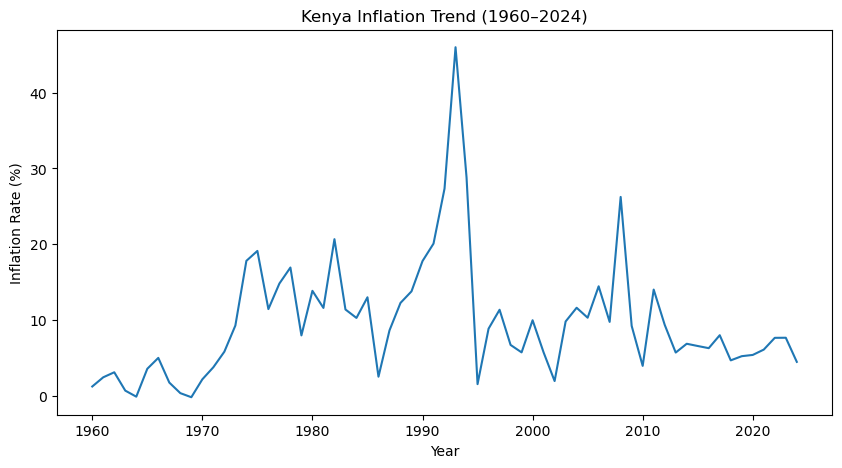

In [8]:
plt.figure(figsize=(10,5))
plt.plot(kenya_df["Year"], kenya_df["Inflation Rate"])
plt.title("Kenya Inflation Trend (1960–2024)")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.savefig("inflation_trend.png")
plt.show()


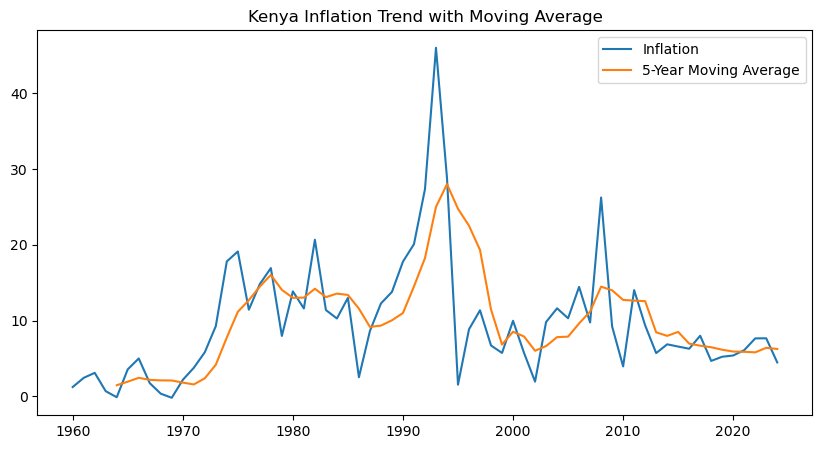

In [9]:
kenya_df["Moving Average"] = kenya_df["Inflation Rate"].rolling(window=5).mean()

plt.figure(figsize=(10,5))
plt.plot(kenya_df["Year"], kenya_df["Inflation Rate"], label="Inflation")
plt.plot(kenya_df["Year"], kenya_df["Moving Average"], label="5-Year Moving Average")

plt.legend()
plt.title("Kenya Inflation Trend with Moving Average")
plt.savefig("Inflation-with-Moving-Average.png",dpi=300, bbox_inches="tight")
plt.show()


In [4]:
top_inflation = kenya_df.sort_values(by="Inflation Rate", ascending=False).head(10)

print(top_inflation)


    Year  Inflation Rate  Moving Average
33  1993       45.978881       24.993375
34  1994       28.814389       27.998389
32  1992       27.332364       18.250591
48  2008       26.239817       14.477849
22  1982       20.666715       14.207817
31  1991       20.084496       14.511653
15  1975       19.120184       11.164635
14  1974       17.809948        7.778304
30  1990       17.781814       11.001609
18  1978       16.931782       16.026382


In [5]:
print(kenya_df["Inflation Rate"].describe())


count    65.000000
mean      9.702477
std       7.980163
min      -0.171501
25%       4.689806
50%       8.005650
75%      12.264963
max      45.978881
Name: Inflation Rate, dtype: float64


In [6]:
kenya_df.to_csv("cleaned_kenya_inflation.csv", index=False)


<Figure size 640x480 with 0 Axes>